In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../../flaming-choripan')

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '/home/opimentel/tesis/astro-lightcurves-handler/save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_RAW_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd - 0.931[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd - 2.624[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd - 0.931[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd - 2.624[mbs]
─────────────────────────────────────────────────────────────────────────────────────────

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.progress_bars import ProgressBar
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filedir):
    assert filedir.split('.')[-1]==C_.EXT_RAW_LIGHTCURVE
    return load_pickle(filedir)

filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd'
filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.rawlcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset(
(raw - samples 2,047)
 - samples: 2,047 - obs samples: 65,174 (g: 28,351 - r: 36,823)
 - max_length_serial: 798 - max_duration: 538.80[days] - median_cadence: {'g': 2.985023200046271, 'r': 2.9737500499468297}
   |▏       | SLSN - 33/2,047 (1.61%)
   |█████▉  | SNIa - 1,534/2,047 (74.94%)
   |▍       | SNIbc - 103/2,047 (5.03%)
   |█▍      | merSNII - 377/2,047 (18.42%)
)


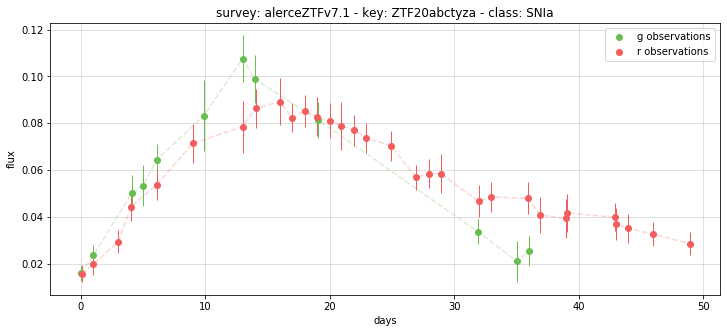

In [4]:
import flamingchoripan.lists as lists
import matplotlib.pyplot as plt
from lchandler.plots.lc import plot_lightcurve

lcset = lcdataset['raw']
lcobj, key = lcset.get_random_lcobj()
fig, ax = plt.subplots(1,1, figsize=(12,5))
for kb,b in enumerate(lcset.band_names):
    plot_lightcurve(ax, lcobj, b, label=f'{b} observations')
ax.set_title(f'survey: {lcset.survey} - key: {key} - class: {lcset.class_names[lcobj.y]}')
ax.set_xlabel('days')
ax.set_ylabel('flux')
ax.legend()
ax.grid(alpha=0.5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[]

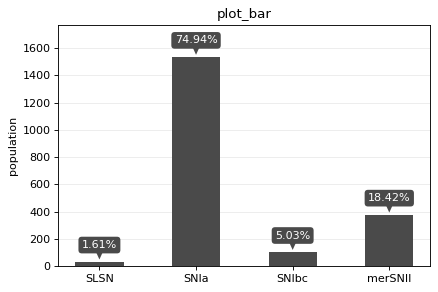

In [5]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cuteplots.plots as cplots
import flamingchoripan.cuteplots.colors as cc

cmap = cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']])
labels = lcdataset['raw'].get_lcobj_classes()
fig, ax = cplots.plot_hist_labels(labels, lcdataset['raw'].class_names, cmap=cmap)
plt.plot()

In [6]:
%load_ext autoreload
%autoreload 2

new_sets = {
    'raw_train':0.8,
    'raw_val':0.2,
    #'raw_test':0.1,
}
lcdataset.split('raw', new_sets)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset(
(raw - samples 2,047)
 - samples: 2,047 - obs samples: 65,174 (g: 28,351 - r: 36,823)
 - max_length_serial: 798 - max_duration: 538.80[days] - median_cadence: {'g': 2.985023200046271, 'r': 2.9737500499468297}
   |▏       | SLSN - 33/2,047 (1.61%)
   |█████▉  | SNIa - 1,534/2,047 (74.94%)
   |▍       | SNIbc - 103/2,047 (5.03%)
   |█▍      | merSNII - 377/2,047 (18.42%)
(raw_train - samples 1,636)
 - samples: 1,636 - obs samples: 52,389 (g: 22,836 - r: 29,553)
 - max_length_serial: 798 - max_duration: 538.80[days] - median_cadence: {'g': 2.9840798501390964, 'r': 2.9728009002283216}
   |▏       | SLSN - 26/1,636 (1.59%)
   |██████  | SNIa - 1,227/1,636 (75.00%)
   |▍       | SNIbc - 82/1,636 (5.01%)
   |█▍      | merSNII - 301/1,636 (18.40%)
(raw_val - samples 411)
 - samples: 411 - obs samples: 12,785 (g: 5,515 - r: 7,270)
 - max_length_serial: 263 - max_duration: 398.94[days] - median_cad

In [7]:
%load_ext autoreload
%autoreload 2

sigma_clipping_kwargs = {
    'sigma_n':1,
    'sigma_m':5, # 1, 3, 5
    'apply_lower_bound':False,
    'verbose':0,
}
for ks,set_name in enumerate(['raw_train', 'raw_val']):
    lcdataset.sigma_clipping(set_name, set_name.replace('raw_',''), **sigma_clipping_kwargs)

print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset(
(raw - samples 2,047)
 - samples: 2,047 - obs samples: 65,174 (g: 28,351 - r: 36,823)
 - max_length_serial: 798 - max_duration: 538.80[days] - median_cadence: {'g': 2.985023200046271, 'r': 2.9737500499468297}
   |▏       | SLSN - 33/2,047 (1.61%)
   |█████▉  | SNIa - 1,534/2,047 (74.94%)
   |▍       | SNIbc - 103/2,047 (5.03%)
   |█▍      | merSNII - 377/2,047 (18.42%)
(raw_train - samples 1,636)
 - samples: 1,636 - obs samples: 52,389 (g: 22,836 - r: 29,553)
 - max_length_serial: 798 - max_duration: 538.80[days] - median_cadence: {'g': 2.9840798501390964, 'r': 2.9728009002283216}
   |▏       | SLSN - 26/1,636 (1.59%)
   |██████  | SNIa - 1,227/1,636 (75.00%)
   |▍       | SNIbc - 82/1,636 (5.01%)
   |█▍      | merSNII - 301/1,636 (18.40%)
(raw_val - samples 411)
 - samples: 411 - obs samples: 12,785 (g: 5,515 - r: 7,270)
 - max_length_serial: 263 - max_duration: 398.94[days] - median_cad

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


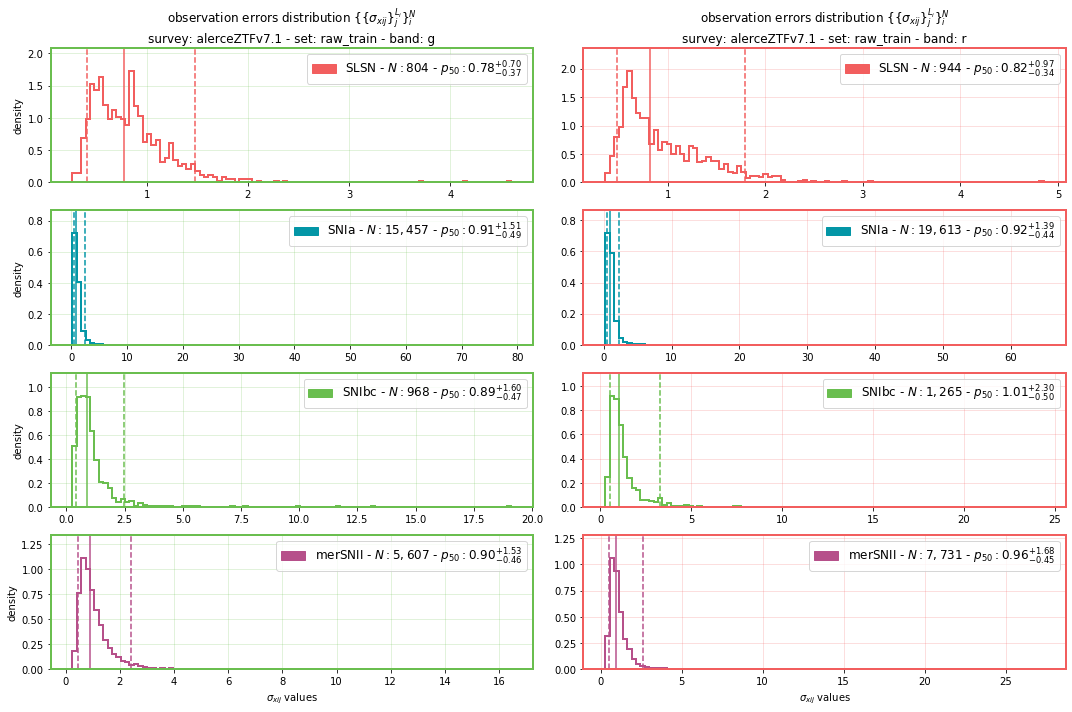

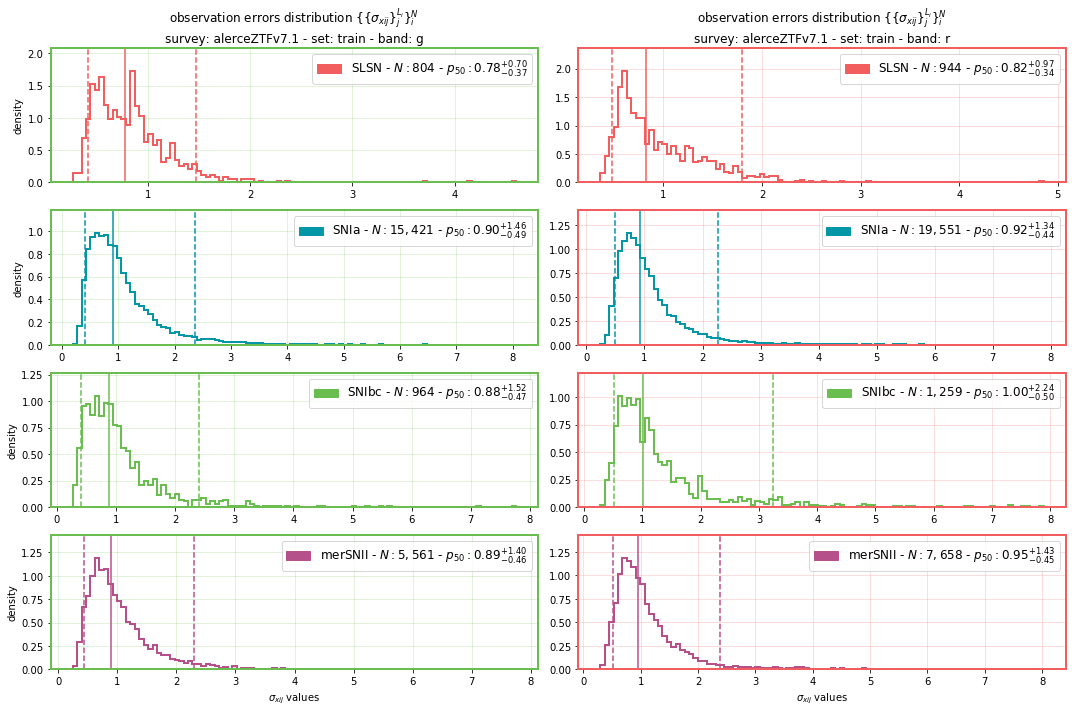

In [8]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_sigma_distribution

plot_sigma_distribution(lcdataset, 'raw_train')
plot_sigma_distribution(lcdataset, 'train')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


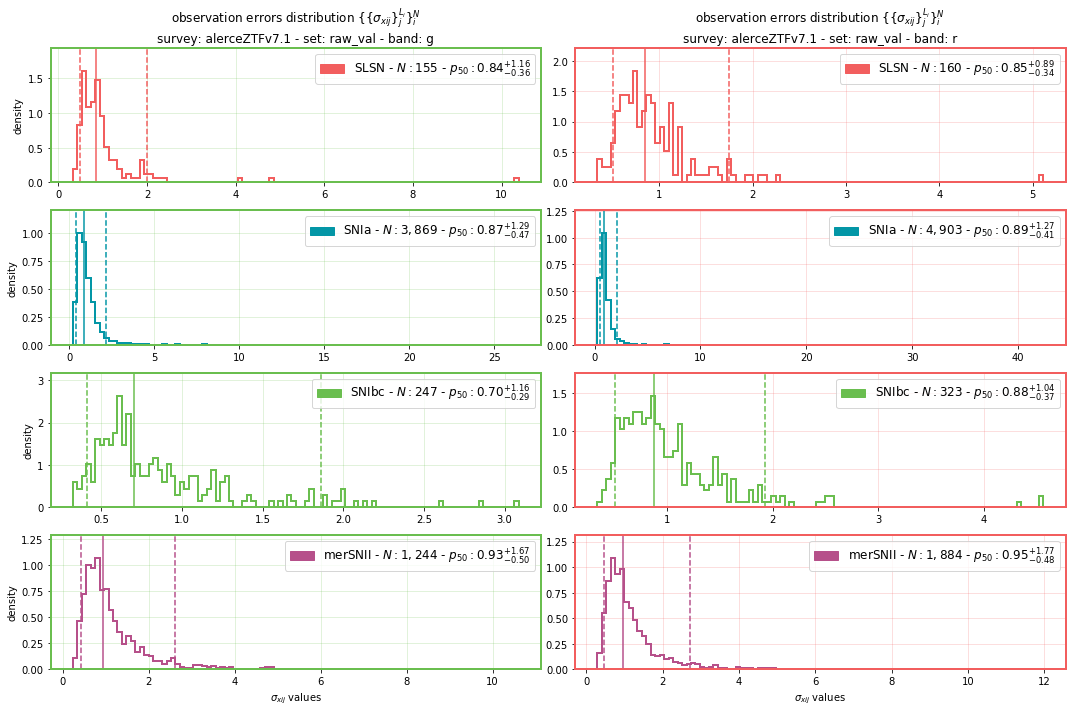

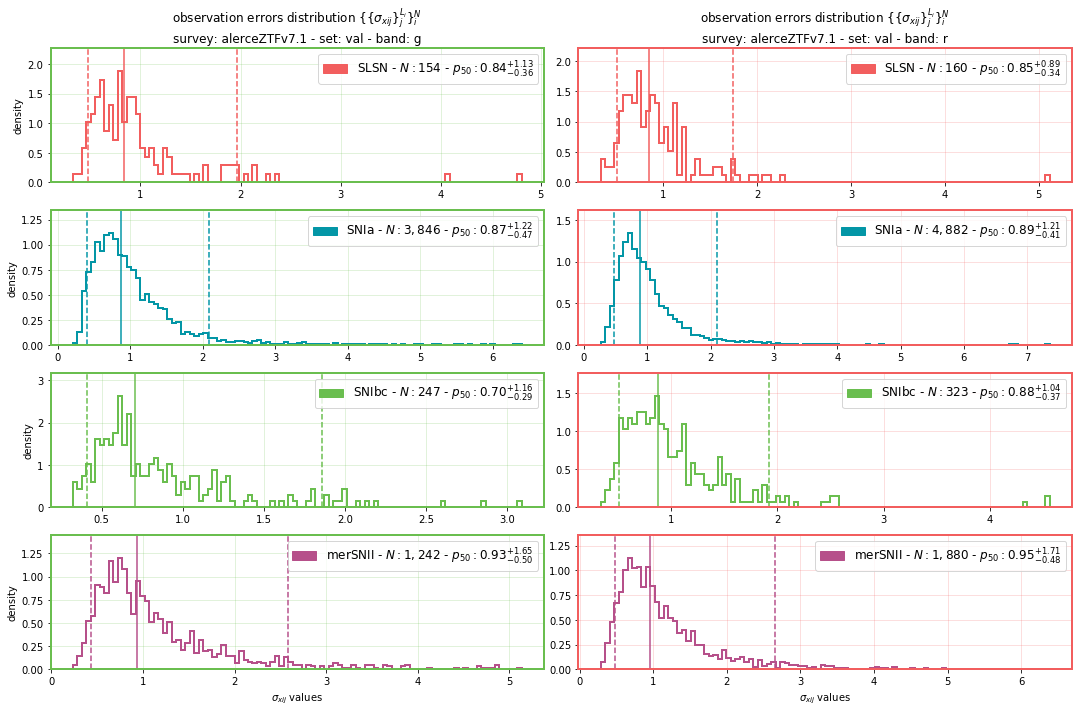

In [9]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_sigma_distribution

plot_sigma_distribution(lcdataset, 'raw_val')
plot_sigma_distribution(lcdataset, 'val')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


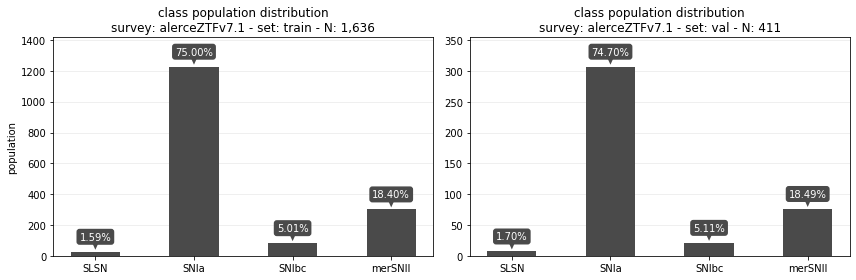

In [10]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.bars import plot_class_distribution

plot_class_distribution(lcdataset, 'train', 'val')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


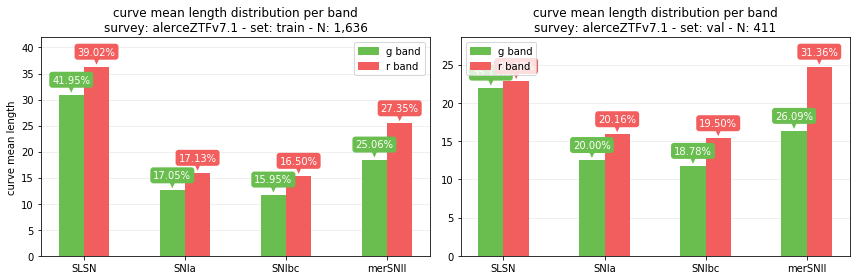

In [11]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.bars import plot_mean_length_distribution

plot_mean_length_distribution(lcdataset, 'train', 'val')

In [12]:
from flamingchoripan.files import load_pickle, save_pickle
from lchandler import C_

kfid = 0
new_cfilename = f'{cfilename}_kfid-{kfid}'
save_filedir = f'{root_folder}/{new_cfilename}.{C_.EXT_SPLIT_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)

> saving: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd


'/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd'